This notebook takes simulated data outputs average R0 and epidemic size from csv files generated by running the model many times and plots the results

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

plt.rcParams.update({'font.size':20})

In [2]:
def summary_sizes(infile):
    
    epi_size = []

    with open(infile) as f:
        for l in f:
            toks = l.strip("\n").split(",")
            epi_size.append(int(toks[0]))

            
    size_freq = Counter(epi_size)
    
    sum_of_numbers = sum(number*count for number, count in size_freq.items())
    count = sum(count for n, count in size_freq.items())
    mean = sum_of_numbers / count
    
    print("Average epidemic size = " + str(mean))
    
    print("Range = " + str(min(epi_size)) + " to " + str(max(epi_size)))
    
    print("Percentage that didn't spread at all = " + str((size_freq[1]/count)*100) + " (" + str(size_freq[1]) + ")" )
    



In [10]:
def plt_size(infile):
    
    epi_size = []
    big_sizes = {}
    normals = {}
    smalls = {}

    with open(infile) as f:
        for l in f:
            toks = l.strip("\n").split(",")
            epi_size.append(int(toks[0]))



    size_freq = Counter(epi_size)

    print("Largest epidemic = " + str(max(epi_size)))
    
    
    for key, value in size_freq.items():
        if key > 50000:
            big_sizes[key] = value
        
        if key < 300:
            smalls[key] = value
        
        if key < 5000:
            normals[key] = value
    
#     x = list(normals.keys())
#     y = list(normals.values())
    
#     x = list(big_sizes.keys())
#     y= list(big_sizes.values())

    x = list(size_freq.keys())
    y = list(size_freq.values())

#     x = list(smalls.keys())
#     y = list(smalls.values())
    
    plt.title("Epidemic size")
    plt.xlabel("Number of cases")
    plt.ylabel("Frequency")
    #plt.bar(x, y)
    artist = plt.bar(x, y)
    matplotlib.artist.setp(artist, color = "blue")
    
    #plt.savefig("Results/More_test_runs/1/epidemic_sizes_smalls.pdf", bbox_inches="tight")
    
    plt.show()   

In [12]:
def plt_R0(infile):
    
    R0 = []

    with open(infile) as f:
        for l in f:
            toks = l.strip("\n").split(",")
    #         print(type(toks[0]))
            R0.append(round(float(toks[0]), 2))

    print("Largest R0 = " + str(max(R0)))

    R0_freq = Counter(R0)

    x = list(R0_freq.keys())

    y = list(R0_freq.values())

    plt.title("Average R0")
    plt.xlabel("R0")
    plt.ylabel("Frequency")
    plt.bar(x, y, width = 0.01)
#     artist = plt.bar(x, y)
#     matplotlib.artist.setp(artist, color = "blue")
    
    
    #plt.savefig("Results/More_test_runs/1/R0.pdf", bbox_inches="tight")
    
    plt.show()  

In [13]:
def plt_district_number(infile):
    
    district_number = []
    epi_size = []

    with open(infile) as f:
        for l in f:
            toks = l.strip("\n").split(",")
            epi_size.append(int(toks[0]))
            district_number.append(int(toks[1]))


    size_freq = Counter(epi_size)
    dist_freq = Counter(district_number)
    
    print("range in number of districts = " 
          + str(min(district_number)) + " to " + str(max(district_number)))
    
    x = list(dist_freq.keys())
    y = list(dist_freq.values())


    plt.title("Number of districts involved")
    plt.xlabel("Number of districts")
    plt.ylabel("Frequency")
    plt.bar(x, y)
    

    #plt.savefig("Results/More_test_runs/1/district_number.pdf", bbox_inches="tight")
    
    plt.show()   

In [14]:
def plt_dist_size(infile):
    
    district_number = []
    epi_size = []

    with open(infile) as f:
        for l in f:
            toks = l.strip("\n").split(",")
            epi_size.append(int(toks[0]))
            district_number.append(int(toks[1]))
            
    x = district_number
    y = epi_size
    
    
    plt.title("Districts against epidemic size")
    plt.xlabel("Number of districts with cases")
    plt.ylabel("Epidemic size")
    plt.scatter(x,y)
    
    
    #plt.savefig("Results/More_test_runs/1/district_against_size.pdf",bbox_inches="tight")
    
    plt.show()

In [15]:
def plt_cluster_size(infile):
    

    small_epis = []
    epi_size = []
    cluster_number = []
    
    tup_list = []
    small_epis = []

    with open(infile) as f:
        for l in f:
            toks = l.strip("\n").split(",")
            epi_size.append(int(toks[0]))
            cluster_number.append(int(toks[2]))
            tup_list.append((int(toks[0]), int(toks[2])))
            
    x = cluster_number
    y = epi_size
    
    
#     for item in tup_list:
#         if item[0] < 5000:
#             small_epis.append((item[0], item[1]))
            
#     x = [item[0] for item in small_epis]
#     y = [item[1] for item in small_epis]
    
    
    plt.title("Household clusters against epidemic size")
    plt.xlabel("Number of household clusters with cases")
    plt.ylabel("Epidemic size")
    plt.scatter(x,y)
    plt.scatter(x,y)
    
    #plt.savefig("Results/More_test_runs/1/cluster_against_size_smalls.pdf", bbox_inches="tight")
    
    plt.show()

In [16]:
def plot_summary(size_file, R0_file):
    
    summary_sizes(size_file)
    plt_size(size_file)
    plt_cluster_size(size_file)
    plt_dist_size(size_file)
    plt_district_number(size_file)
    plt_R0(R0_file)

Average epidemic size = 3.0319
Range = 1 to 62
Percentage that didn't spread at all = 49.39 (4939)
Largest epidemic = 62


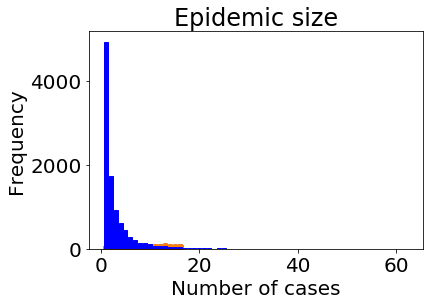

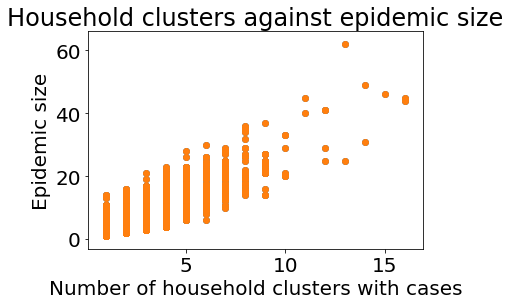

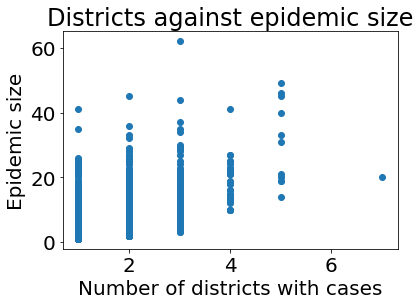

range in number of districts = 1 to 7


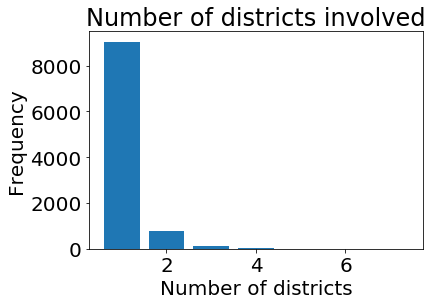

Largest R0 = 0.98


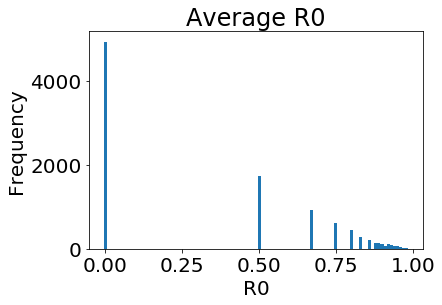

In [17]:
plot_summary("Results/v8_runs/1/epidemic_size.csv", "Results/v8_runs/1/R0_run.csv")